In [1]:
import open3d as o3d
import copy
import numpy as np
from scipy.linalg import logm
from scipy.spatial.transform import Rotation as R
from scipy.optimize import fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from tabulate import tabulate

In [2]:
def one_one(file):
    pcd = o3d.io.read_point_cloud(file)
    o3d.visualization.draw_geometries([pcd])
    return pcd
path = '../Assignment_2.1/'
pcdf = one_one(path+"pcd.ply")

(122829, 3)
min x -68.10630018257655 max X 74.29852870082378 min y -74.67544320017304 max y 74.02465032337722 minZ -22.855886816309194 and maxZ 45.742363547997286


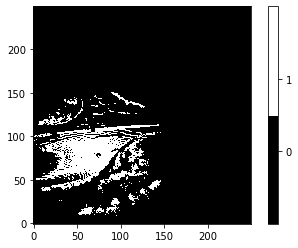

In [3]:
points = np.asarray(pcdf.points)
o3d.visualization.draw_geometries([pcdf])
print(points.shape)
occMap = np.zeros((250, 250))
maxX = 0
maxY = 0
maxZ = 0
minX = 1000
minY = 1000
minZ = 1000
for p in points:
	occMap[int(p[0]) + 77][int(p[1]) + 75] += 1
	if maxX < p[0]:
		maxX = p[0]
	if maxY < p[1]:
	    maxY = p[1]
	if maxZ < p[2]:
		maxZ = p[2]
	if minX > p[0]:
	    minX = p[0]
	if minY > p[1]:
	    minY = p[1]
	if minZ > p[2]:
		minZ = p[2]

print(f"min x {minX} max X {maxX} min y {minY} max y {maxY} minZ {minZ} and maxZ {maxZ}")

for i in range(250):
	for j in range(250):
		if occMap[i][j] > 0:
			occMap[i][j] = 1
		else:
			occMap[i][j] = 0
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['black','white'],256)
bounds=[-1,0.5, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# tell imshow about color map so that only set colors are used
img = plt.imshow(occMap,interpolation='nearest',
                    cmap = cmap,norm=norm,origin='lower')

# make a color bar
plt.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[0,1])
plt.show()
